In [25]:

#1. Прочитайте CSV файл (використовуйте метод read_csv):


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



file_path = '/content/Global YouTube Statistics.csv'

df = pd.read_csv(file_path, encoding='windows-1251')




In [2]:
#2. Виведіть перші п'ять рядків (використовується метод head):
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [3]:
#3. Виведіть розміри датасету (використовуйте метод shape):
print("Розміри датасету:", df.shape)

Розміри датасету: (995, 28)


In [4]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum)
missing_values = df.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

df = df.replace('-', np.nan)

missing_values_after = df.isna().sum()
print("Кількість пропусків у кожному стовпці після обробки:")
print(missing_values_after)

Кількість пропусків у кожному стовпці:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month        

In [26]:
#Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на floa
numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns] = df[numeric_columns].apply(lambda col: col.fillna(col.mean()), axis=0)

df[numeric_columns] = df[numeric_columns].astype(float)
print(df.head())


   rank                    Youtuber  subscribers   video views  \
0   1.0                    T-Series  245000000.0  2.280000e+11   
1   2.0              YouTube Movies  170000000.0  0.000000e+00   
2   3.0                     MrBeast  166000000.0  2.836884e+10   
3   4.0  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4   5.0                   SET India  159000000.0  1.480000e+11   

           category                       Title   uploads        Country  \
0             Music                    T-Series   20082.0          India   
1  Film & Animation               youtubemovies       1.0  United States   
2     Entertainment                     MrBeast     741.0  United States   
3         Education  Cocomelon - Nursery Rhymes     966.0  United States   
4             Shows                   SET India  116536.0          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                  2.000000e+06   
1         

In [11]:
#Ще раз перевірте кількість пропусків.
missing_values_after = df.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values_after)

Кількість пропусків у кожному стовпці:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month        

In [15]:
# Перевірте, скільки унікальних країн представлено у колонці "Country"
unique_countries = df['Country'].nunique()
print("Кількість унікальних країн:", unique_countries)

Кількість унікальних країн: 49


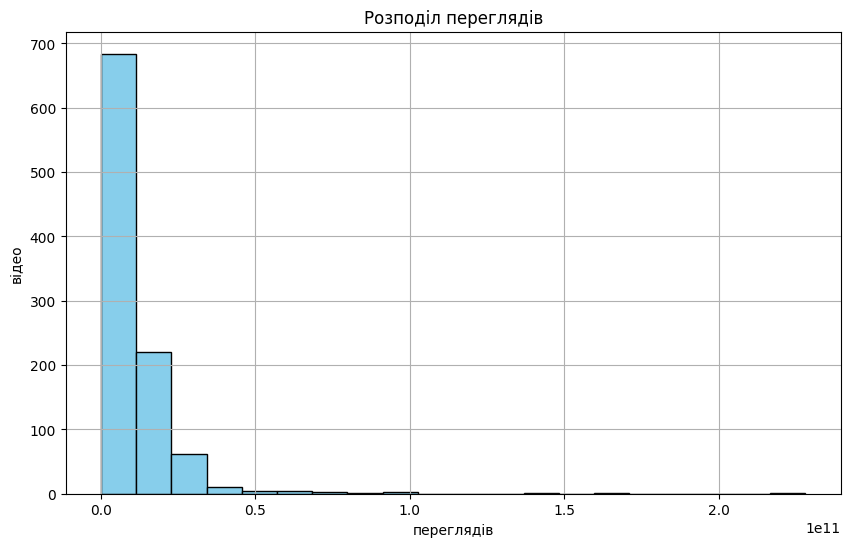

In [21]:
#Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
plt.figure(figsize=(10, 6))
plt.hist(df['video views'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл переглядів')
plt.xlabel('переглядів')
plt.ylabel('відео')
plt.grid(True)
plt.show()

In [22]:
# Максимальна кількість переглядів
max_views = df['video views'].max()
print("Максимальна кількість переглядів:", max_views)

# Мінімальна кількість переглядів
min_views = df['video views'].min()
print("Мінімальна кількість переглядів:", min_views)

# Середня кількість переглядів
mean_views = df['video views'].mean()
print("Середня кількість переглядів:", mean_views)

Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [23]:
# Знаходження країни з найбільшою кількістю відео
country_with_max_videos = df['uploads'].idxmax()

print("Країна з найбільшою кількістю відео:", df.loc[country_with_max_videos, 'Country'])

Країна з найбільшою кількістю відео: India


In [24]:
#найдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.
max_uploads_index = df['uploads'].idxmax()
min_uploads_index = df['uploads'].idxmin()

video_with_max_uploads = df.loc[max_uploads_index, 'uploads']
video_with_min_uploads = df.loc[min_uploads_index, 'uploads']

print("Відео з найбільшою кількістю завантажень:", video_with_max_uploads)
print("Відео з найменшою кількістю завантажень:", video_with_min_uploads)

Відео з найбільшою кількістю завантажень: 301308
Відео з найменшою кількістю завантажень: 0
